In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mymodule.adaline import AdalineGD

%matplotlib inline

In [30]:
"""
load data
"""
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

In [31]:
"""
fit with ADALine
"""
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

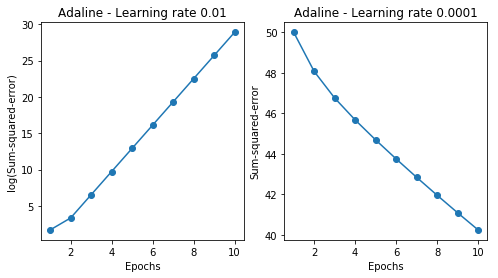

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title('Adaline - Learning rate 0.01')

ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title('Adaline - Learning rate 0.0001')

In [37]:
"""
標準化(standardization)
"""

X_std = np.copy(X)

X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [38]:
ada = AdalineGD(n_iter=15, eta=0.01)

ada.fit(X_std,y)

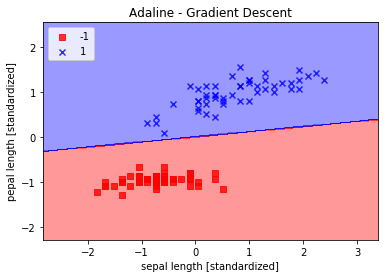

In [44]:
from mymodule.plottools import plot_decision_regions
plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Gradient Descent")
plt.xlabel('sepal length [standardized]')
plt.ylabel('pepal length [standardized]')
plt.legend(loc='upper left')

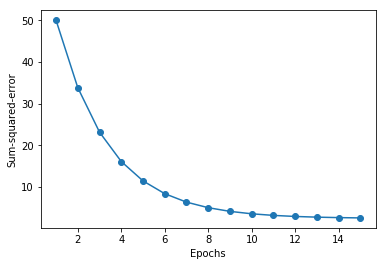

In [49]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')